In [0]:
import pandas as pd
import warnings
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import scipy.stats as ss
from statsmodels.formula.api import ols
from scipy.stats import zscore
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression  
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.dummy import DummyClassifier

%matplotlib inline
import io
from google.colab import files

warnings.filterwarnings('ignore')

In [0]:
col_names=['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points','Wilderness_Area1','Wilderness_Area2','Wilderness_Area3','Wilderness_Area4','Soil_Type1','Soil_Type2','Soil_Type3','Soil_Type4','Soil_Type5','Soil_Type6','Soil_Type7','Soil_Type8','Soil_Type9','Soil_Type10','Soil_Type11','Soil_Type12','Soil_Type13','Soil_Type14','Soil_Type15','Soil_Type16','Soil_Type17','Soil_Type18','Soil_Type19','Soil_Type20','Soil_Type21','Soil_Type22','Soil_Type23','Soil_Type24','Soil_Type25','Soil_Type26','Soil_Type27','Soil_Type28','Soil_Type29','Soil_Type30','Soil_Type31','Soil_Type32','Soil_Type33','Soil_Type34','Soil_Type35','Soil_Type36','Soil_Type37','Soil_Type38','Soil_Type39','Soil_Type40','Cover_Type']
ds=pd.read_csv('/content/covtype.csv',header=None,names=col_names)
ds.shape

(581012, 55)

In [0]:
ds.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [0]:
print('Dimensions:')
print('Number of Records:', ds.shape[0])
print('Number of Features:', ds.shape[1])

Dimensions:
Number of Records: 581012
Number of Features: 55


In [0]:
ds.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,0.448865,0.051434,0.436074,0.063627,0.005217,0.012952,0.008301,0.021335,0.002749,0.011316,0.000181,0.000308,0.001974,0.056168,0.021359,0.051584,0.030001,0.001031,0.000005,0.004897,0.005890,0.003268,0.006921,0.015936,0.001442,0.057439,0.099399,0.036622,0.000816,0.004456,0.001869,0.001628,0.198356,0.051927,0.044175,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,0.497379,0.220882,0.495897,0.244087,0.072039,0.113066,0.090731,0.144499,0.052356,0.105775,0.013442,0.017550,0.044387,0.230245,0.144579,0.221186,0.170590,0.032092,0.002272,0.069804,0.076518,0.057077,0.082902,0.125228,0.037950,0.232681,0.299197,0.187833,0.028551,0.066605,0.043193,0.040318,0.398762,0.221879,0.205483,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [0]:
#checking missing values
print(list(ds.isnull().any()))

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]


In [0]:
#cover type count and visualization
ds.Cover_Type.value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Cover_Type, dtype: int64

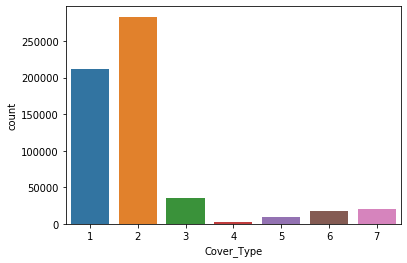

In [0]:
sns.countplot(x='Cover_Type',data=ds)
plt.show()

In [0]:
#finding skew
print(ds.skew())

Elevation                              -0.817596
Aspect                                  0.402628
Slope                                   0.789273
Horizontal_Distance_To_Hydrology        1.140437
Vertical_Distance_To_Hydrology          1.790250
Horizontal_Distance_To_Roadways         0.713679
Hillshade_9am                          -1.181147
Hillshade_Noon                         -1.063056
Hillshade_3pm                          -0.277053
Horizontal_Distance_To_Fire_Points      1.288644
Wilderness_Area1                        0.205618
Wilderness_Area2                        4.061595
Wilderness_Area3                        0.257822
Wilderness_Area4                        3.575561
Soil_Type1                             13.736670
Soil_Type2                              8.615358
Soil_Type3                             10.838630
Soil_Type4                              6.625176
Soil_Type5                             18.995243
Soil_Type6                              9.240061
Soil_Type7          

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54]), <a list of 55 Text xticklabel objects>)

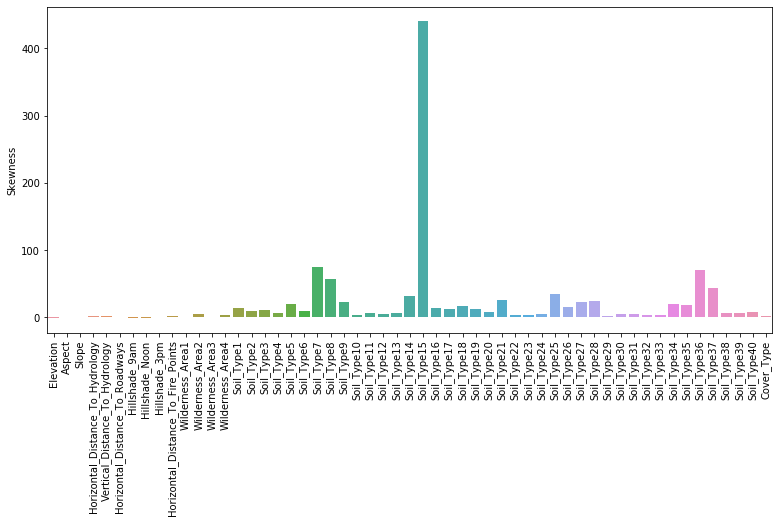

In [0]:
skew=ds.skew()
skew_data=pd.DataFrame(skew,index=None,columns=['Skewness'])
plt.figure(figsize=(13,6))
sns.barplot(x=skew_data.index,y='Skewness',data=skew_data)
plt.xticks(rotation=90)

In [0]:
cont_data=ds.loc[:,'Elevation':'Horizontal_Distance_To_Fire_Points']

binary_data=ds.loc[:,'Wilderness_Area1':'Soil_Type40']

Wilderness_data=ds.loc[:,'Wilderness_Area1': 'Wilderness_Area4']

Soil_data=ds.loc[:,'Soil_Type1':'Soil_Type40']

In [0]:
#preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(cont_data)
finalds = pd.DataFrame(x_scaled)
finalds
ds['Elevation'] = finalds[0]
ds['Aspect'] = finalds[1]
ds['Slope'] = finalds[2]
ds['Horizontal_Distance_To_Hydrology'] = finalds[3]
ds['Vertical_Distance_To_Hydrology'] = finalds[4]
ds['Horizontal_Distance_To_Roadways'] = finalds[5]
ds['Hillshade_9am'] = finalds[6]
ds['Hillshade_Noon'] = finalds[7]
ds['Hillshade_3pm'] = finalds[8]
ds['Horizontal_Distance_To_Fire_Points'] = finalds[9]
print(ds)


        Elevation    Aspect     Slope  ...  Soil_Type39  Soil_Type40  Cover_Type
0        0.368684  0.141667  0.045455  ...            0            0           5
1        0.365683  0.155556  0.030303  ...            0            0           5
2        0.472736  0.386111  0.136364  ...            0            0           2
3        0.463232  0.430556  0.272727  ...            0            0           2
4        0.368184  0.125000  0.030303  ...            0            0           5
...           ...       ...       ...  ...          ...          ...         ...
581007   0.268634  0.425000  0.303030  ...            0            0           3
581008   0.266133  0.422222  0.287879  ...            0            0           3
581009   0.263632  0.441667  0.257576  ...            0            0           3
581010   0.262631  0.472222  0.227273  ...            0            0           3
581011   0.262131  0.458333  0.196970  ...            0            0           3

[581012 rows x 55 columns]


In [0]:
#count of wilderness area and soil type
for col in binary_data:
    count=binary_data[col].value_counts()
    print(col,count)

Wilderness_Area1 0    320216
1    260796
Name: Wilderness_Area1, dtype: int64
Wilderness_Area2 0    551128
1     29884
Name: Wilderness_Area2, dtype: int64
Wilderness_Area3 0    327648
1    253364
Name: Wilderness_Area3, dtype: int64
Wilderness_Area4 0    544044
1     36968
Name: Wilderness_Area4, dtype: int64
Soil_Type1 0    577981
1      3031
Name: Soil_Type1, dtype: int64
Soil_Type2 0    573487
1      7525
Name: Soil_Type2, dtype: int64
Soil_Type3 0    576189
1      4823
Name: Soil_Type3, dtype: int64
Soil_Type4 0    568616
1     12396
Name: Soil_Type4, dtype: int64
Soil_Type5 0    579415
1      1597
Name: Soil_Type5, dtype: int64
Soil_Type6 0    574437
1      6575
Name: Soil_Type6, dtype: int64
Soil_Type7 0    580907
1       105
Name: Soil_Type7, dtype: int64
Soil_Type8 0    580833
1       179
Name: Soil_Type8, dtype: int64
Soil_Type9 0    579865
1      1147
Name: Soil_Type9, dtype: int64
Soil_Type10 0    548378
1     32634
Name: Soil_Type10, dtype: int64
Soil_Type11 0    568602
1 

In [0]:
#determing the features with count less than 1000
for col in binary_data:
    count=binary_data[col].value_counts()[1] 
    if count < 1000:
        print(col,count)

Soil_Type7 105
Soil_Type8 179
Soil_Type14 599
Soil_Type15 3
Soil_Type21 838
Soil_Type25 474
Soil_Type28 946
Soil_Type36 119
Soil_Type37 298


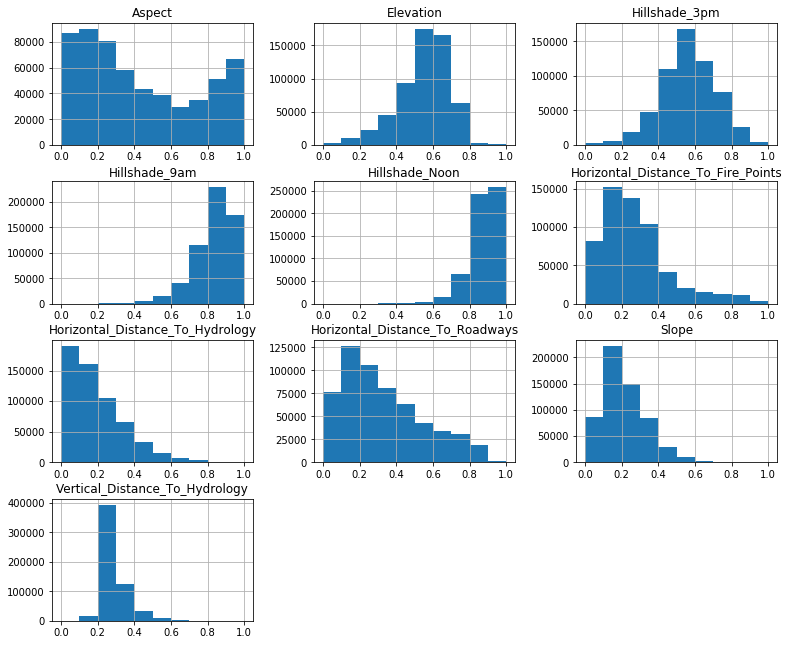

In [0]:
#visualization of continuous data
col = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points']
train = ds[col]
train.hist(figsize=(13, 11))
plt.show()

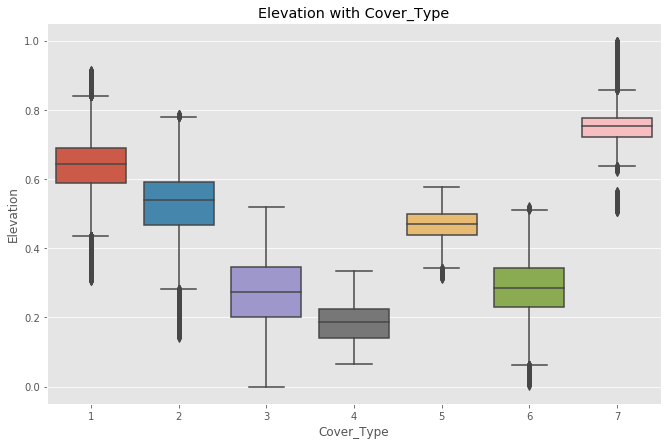

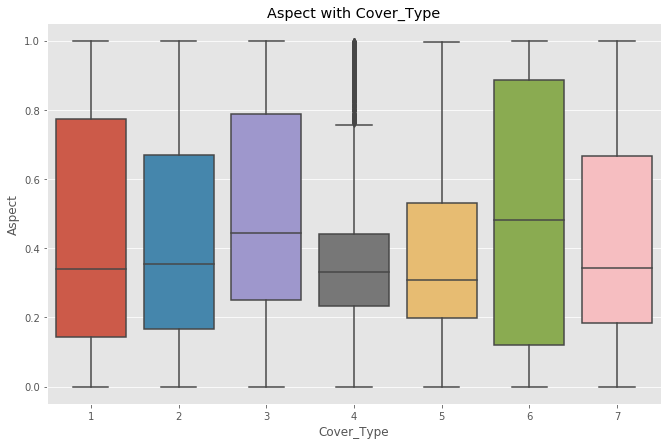

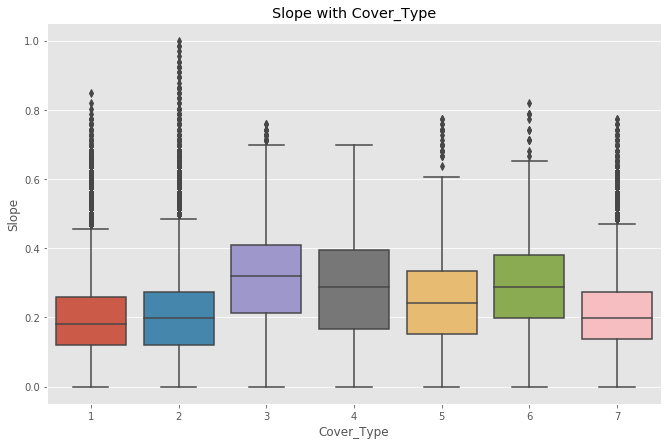

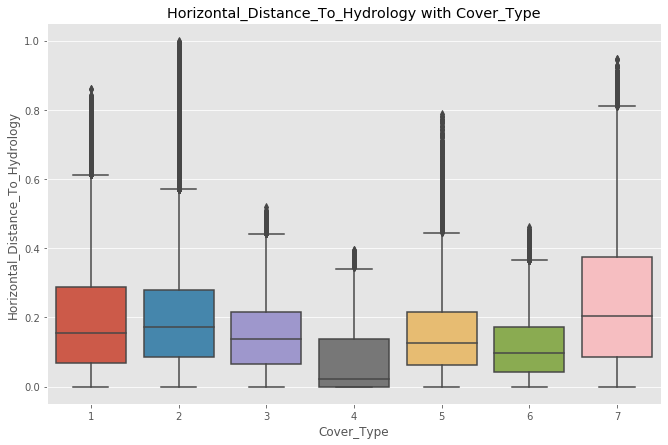

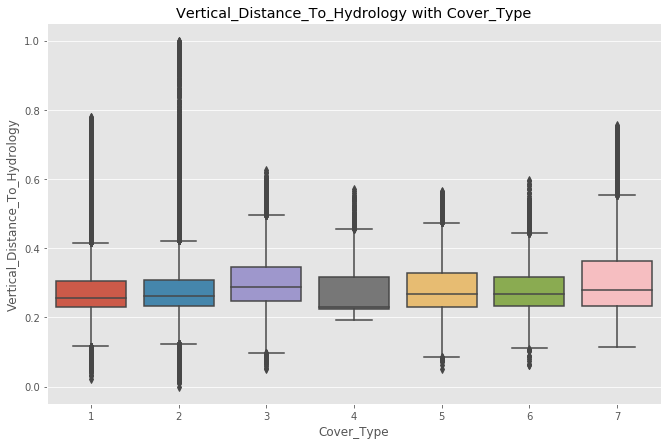

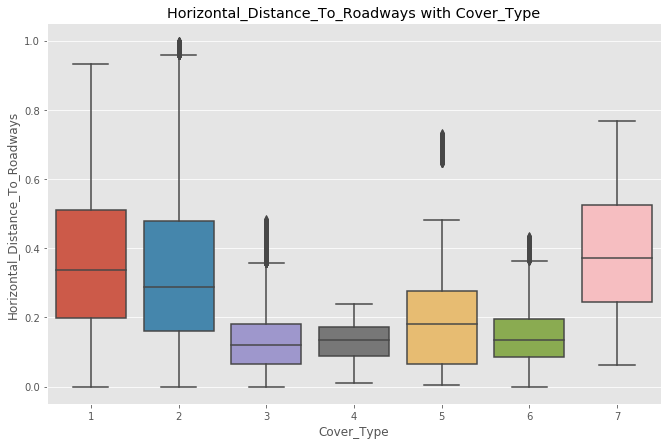

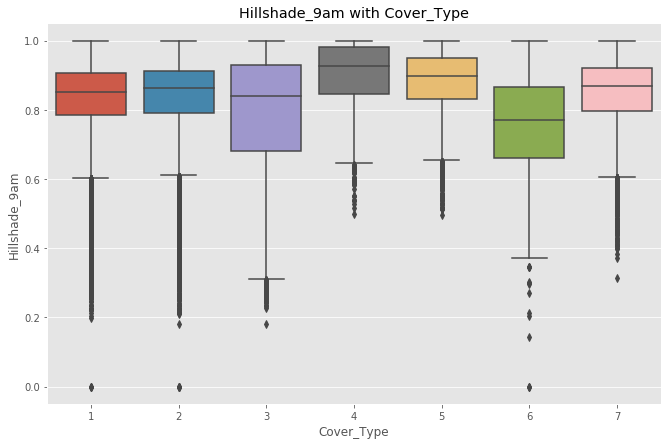

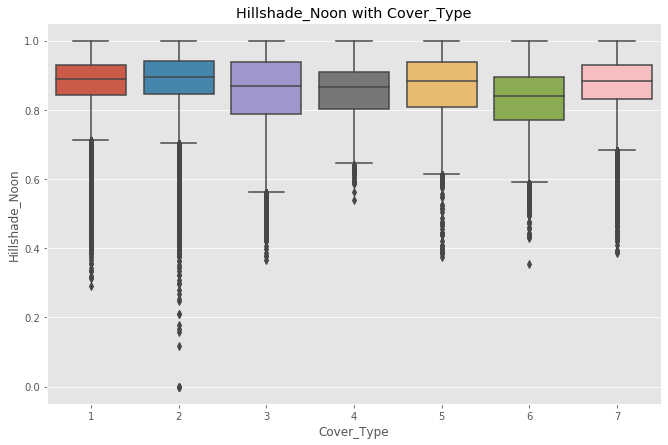

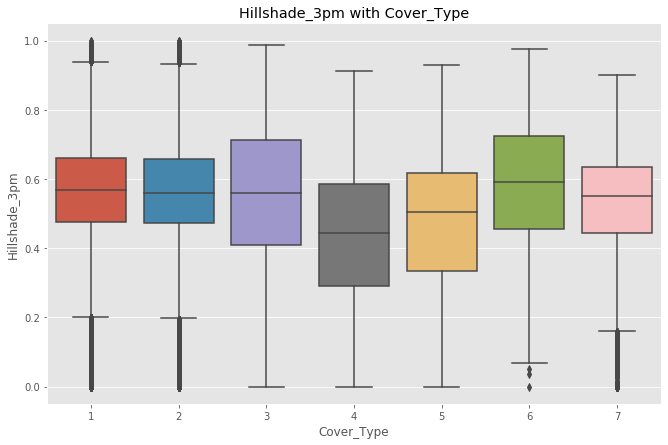

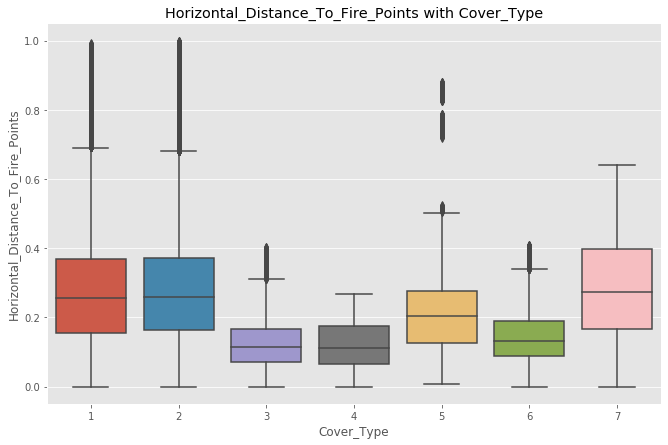

In [0]:
#box plot
plt.style.use('ggplot')
for i in col:
    plt.figure(figsize=(11, 7))
    plt.title(str(i) + " with " + str('Cover_Type'))
    sns.boxplot(x=ds.Cover_Type, y=train[i])
    plt.show()

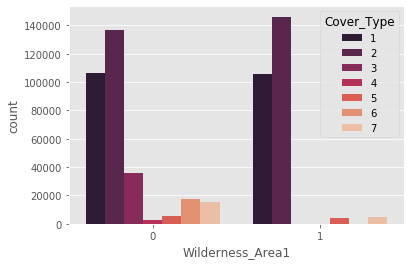

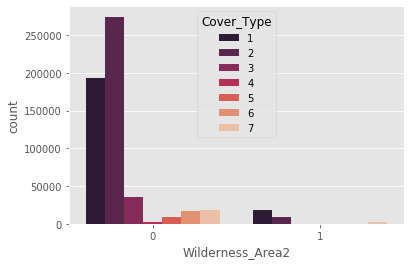

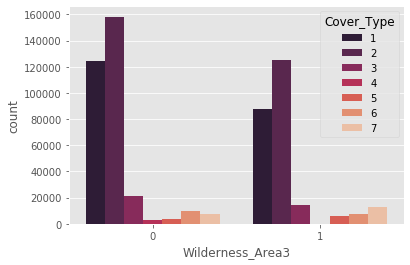

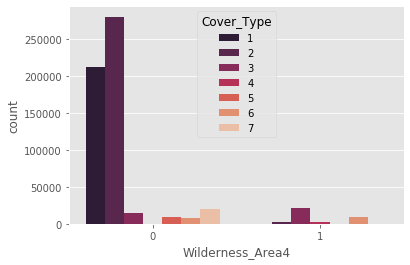

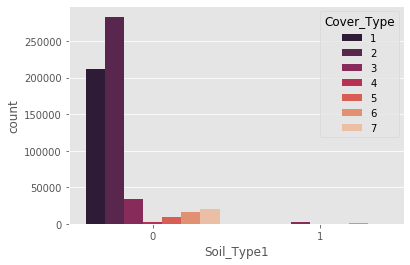

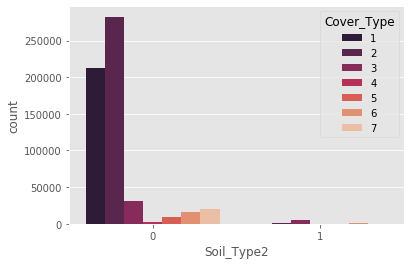

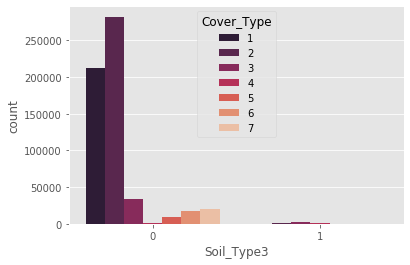

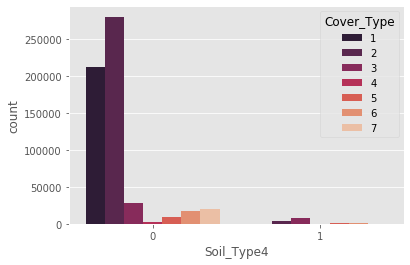

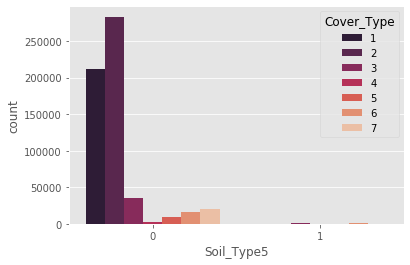

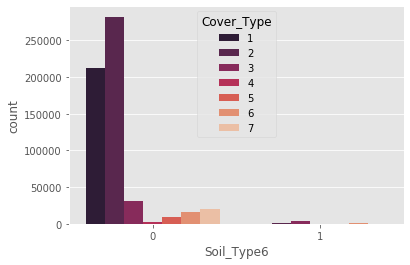

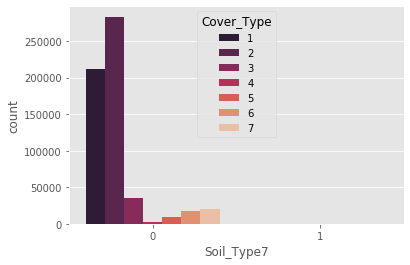

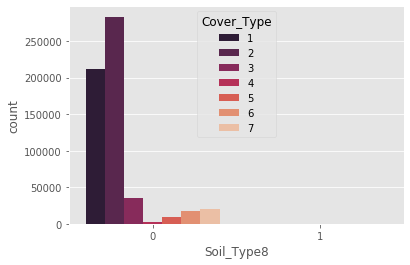

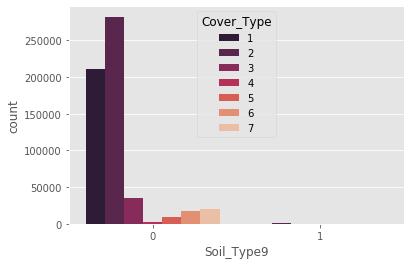

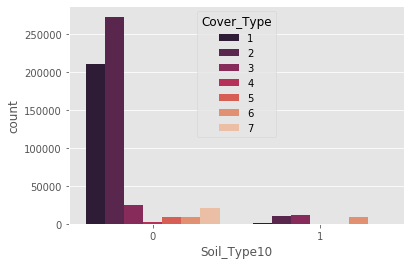

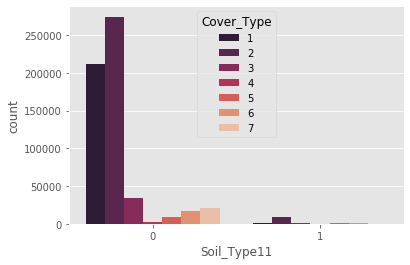

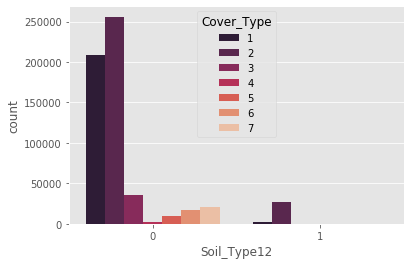

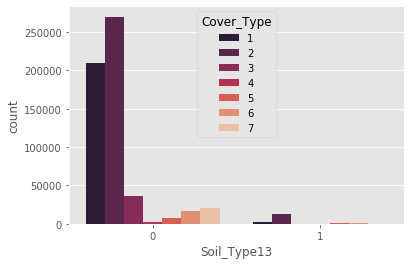

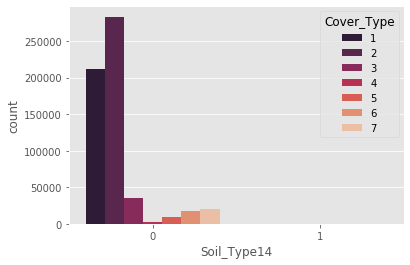

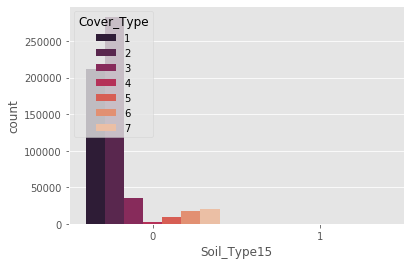

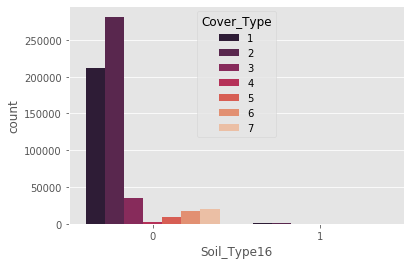

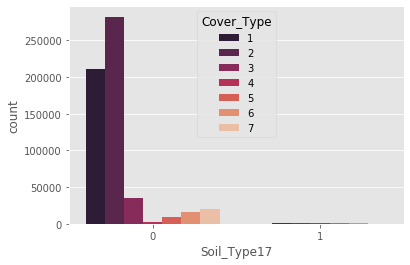

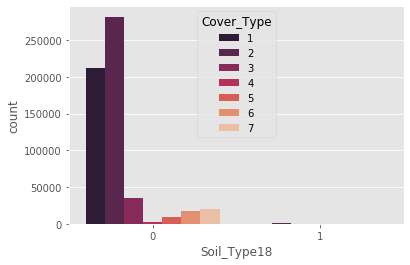

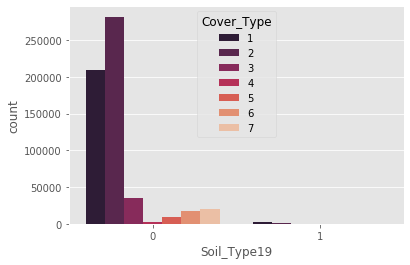

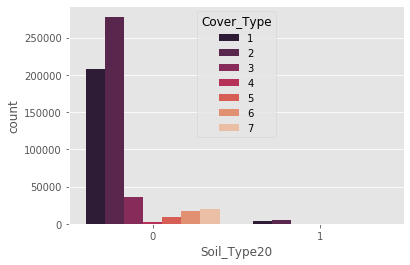

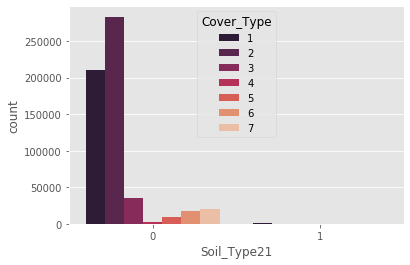

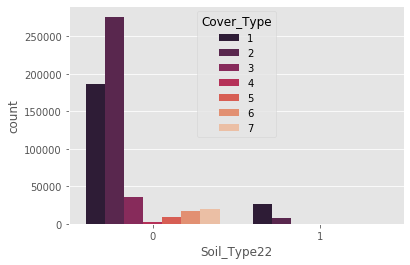

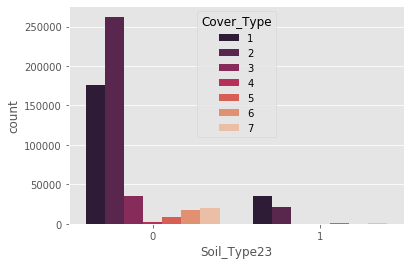

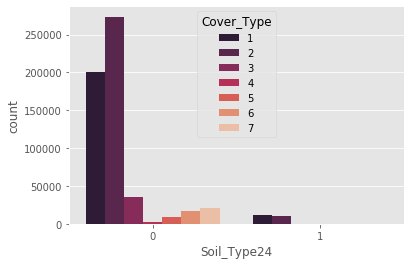

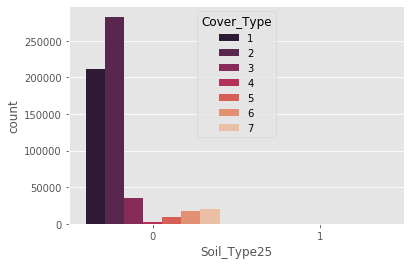

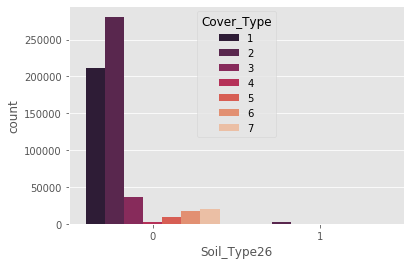

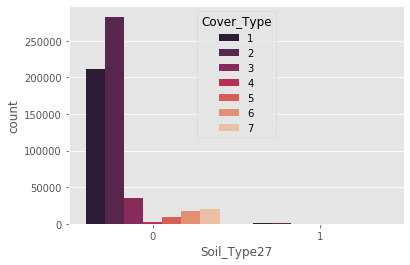

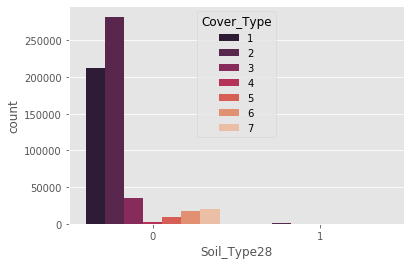

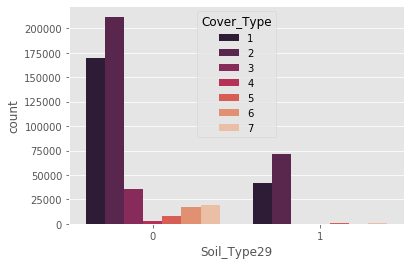

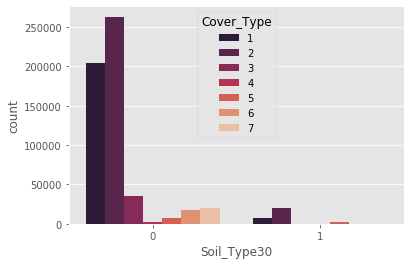

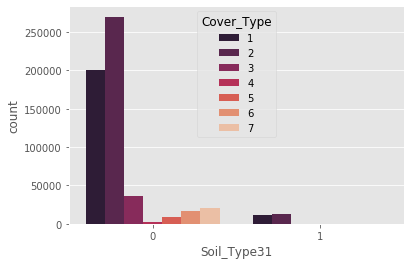

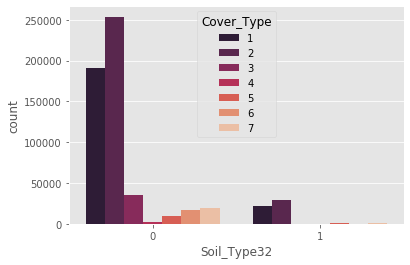

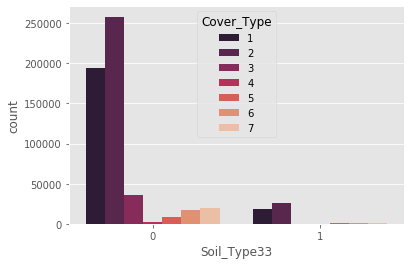

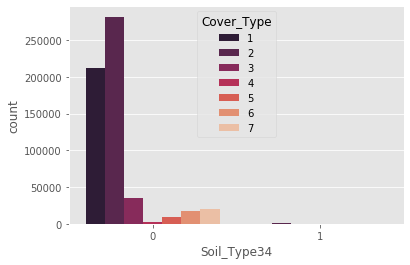

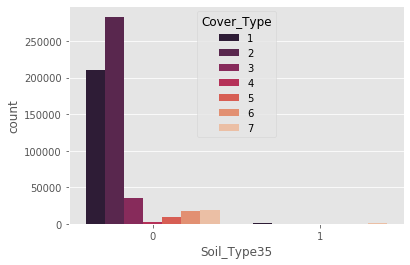

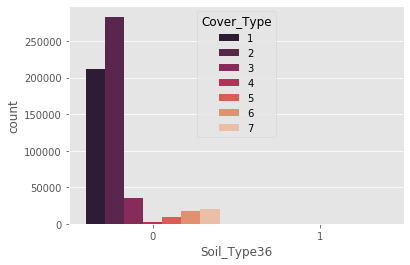

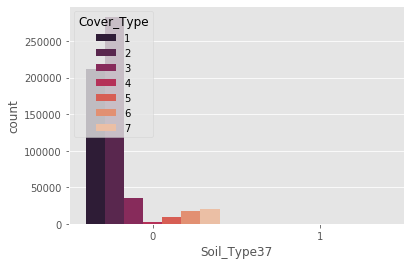

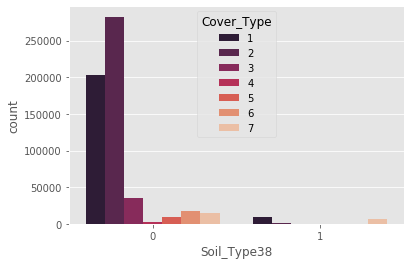

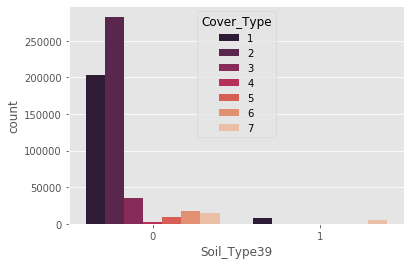

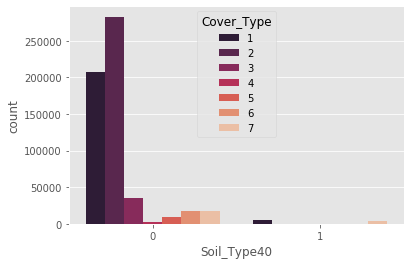

In [0]:
#visualizing binary features
for i, col in enumerate(binary_data.columns):
    plt.figure(i,figsize=(6,4))
    sns.countplot(x=col, hue=ds['Cover_Type'] ,data=ds, palette="rocket")

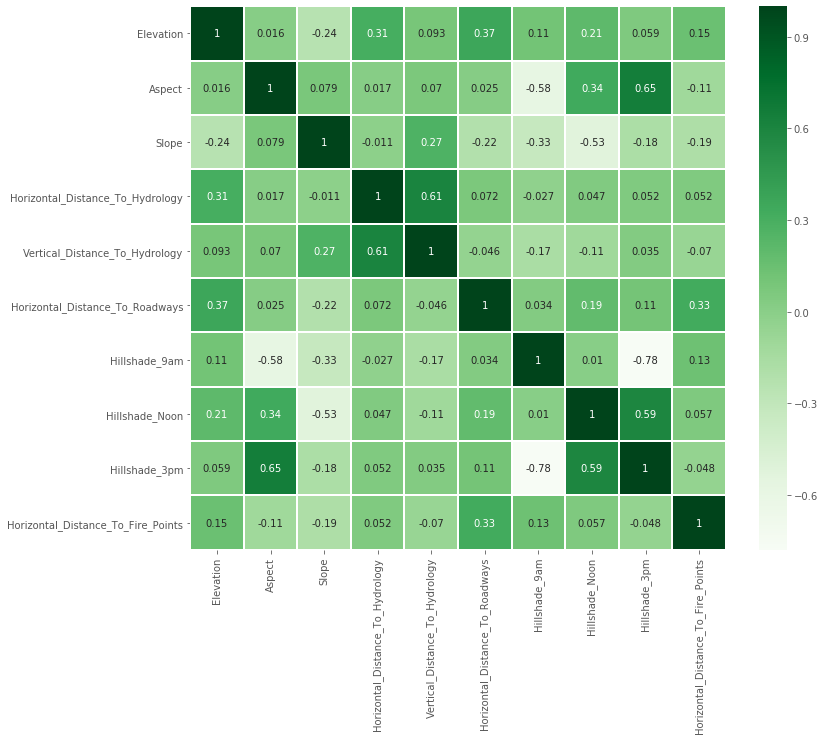

In [0]:
#correlation analysis
plt.figure(figsize=(12, 10))
sns.heatmap(cont_data.corr(),cmap='Greens',linecolor='white',linewidths=1,annot=True)

In [0]:
#checking skewness of non-boolean type
ds.iloc[:,:10].skew()

Elevation                            -0.817596
Aspect                                0.402628
Slope                                 0.789273
Horizontal_Distance_To_Hydrology      1.140437
Vertical_Distance_To_Hydrology        1.790250
Horizontal_Distance_To_Roadways       0.713679
Hillshade_9am                        -1.181147
Hillshade_Noon                       -1.063056
Hillshade_3pm                        -0.277053
Horizontal_Distance_To_Fire_Points    1.288644
dtype: float64

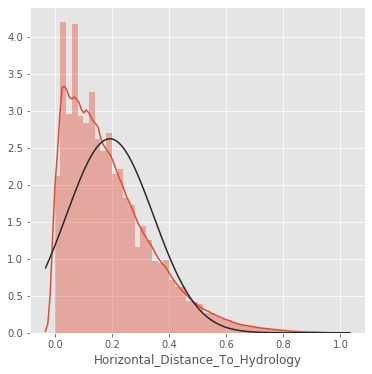

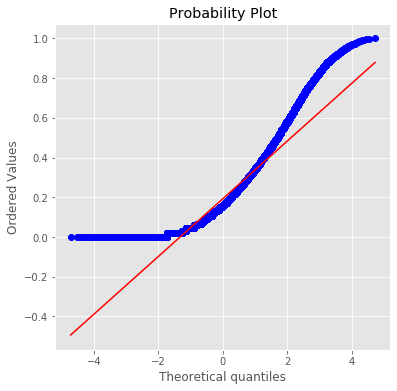

In [0]:
#Horizontal_Distance_To_Hydrology
from scipy import stats
plt.figure(figsize=(6,6))
sns.distplot(ds['Horizontal_Distance_To_Hydrology'], fit = stats.norm)
fig = plt.figure(figsize=(6,6))
res = stats.probplot(ds['Horizontal_Distance_To_Hydrology'], plot=plt)

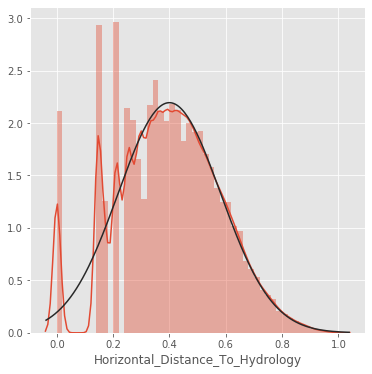

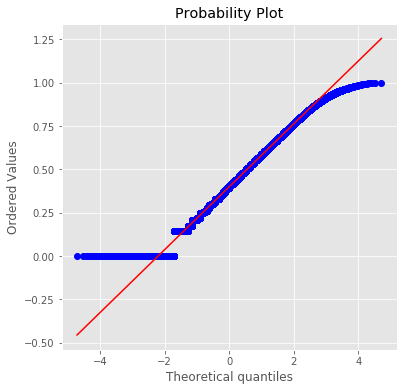

In [0]:
ds['Horizontal_Distance_To_Hydrology'] = np.sqrt(ds['Horizontal_Distance_To_Hydrology'])
# Plot after sqrt transformation
plt.figure(figsize=(6,6))
sns.distplot(ds['Horizontal_Distance_To_Hydrology'], fit = stats.norm)
fig = plt.figure(figsize=(6,6))
res = stats.probplot(ds['Horizontal_Distance_To_Hydrology'], plot=plt)

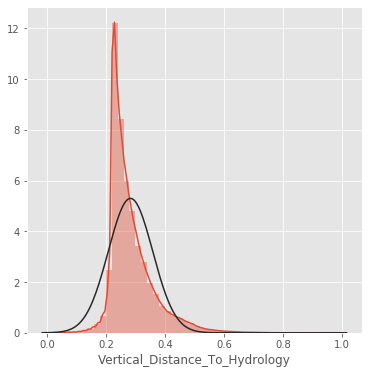

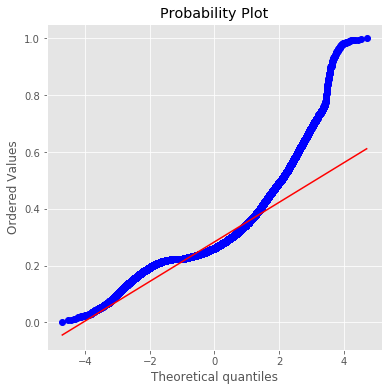

In [0]:
#Vertical_Distance_To_Hydrology
plt.figure(figsize=(6,6))
sns.distplot(ds['Vertical_Distance_To_Hydrology'], fit = stats.norm)
fig = plt.figure(figsize=(6,6))
res = stats.probplot(ds['Vertical_Distance_To_Hydrology'], plot=plt)

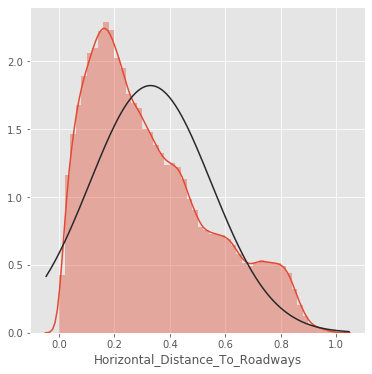

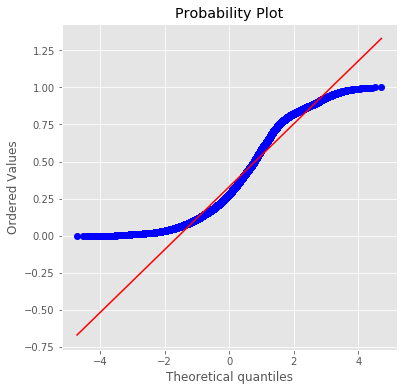

In [0]:
#Horizontal_Distance_To_Roadways
plt.figure(figsize=(6,6))
sns.distplot(ds['Horizontal_Distance_To_Roadways'], fit=stats.norm)
fig = plt.figure(figsize=(6,6))
res = stats.probplot(ds['Horizontal_Distance_To_Roadways'], plot=plt)


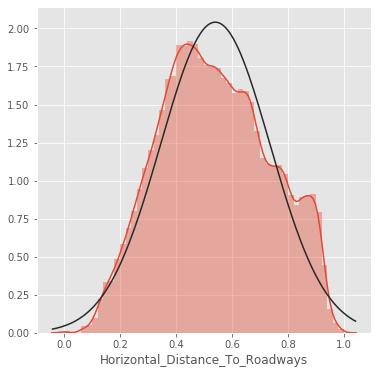

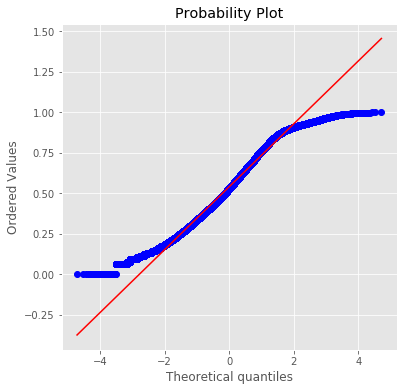

In [0]:
ds['Horizontal_Distance_To_Roadways'] = np.sqrt(ds['Horizontal_Distance_To_Roadways'])
plt.figure(figsize=(6,6))
sns.distplot(ds['Horizontal_Distance_To_Roadways'], fit = stats.norm)
fig = plt.figure(figsize=(6,6))
res = stats.probplot(ds['Horizontal_Distance_To_Roadways'], plot=plt)

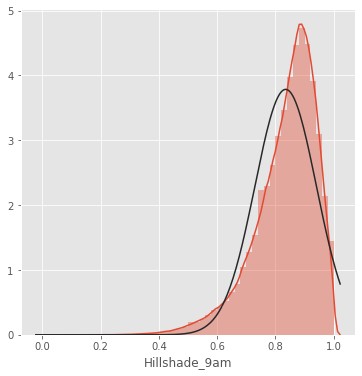

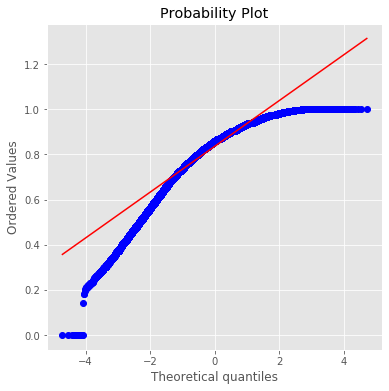

In [0]:
#Hillshade_9am
fig = plt.figure(figsize=(6,6))
sns.distplot(ds['Hillshade_9am'],fit=stats.norm)
fig = plt.figure(figsize=(6,6))
res = stats.probplot(ds['Hillshade_9am'],plot=plt)

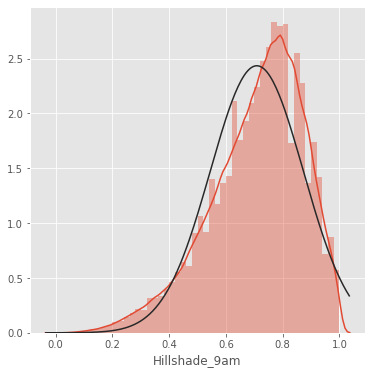

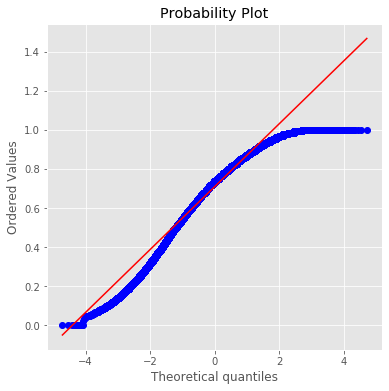

In [0]:
ds['Hillshade_9am'] = np.square(ds['Hillshade_9am'])
plt.figure(figsize=(6,6))
sns.distplot(ds['Hillshade_9am'], fit = stats.norm)
fig = plt.figure(figsize=(6,6))
res = stats.probplot(ds['Hillshade_9am'], plot=plt)

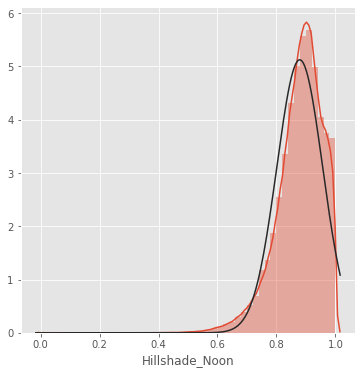

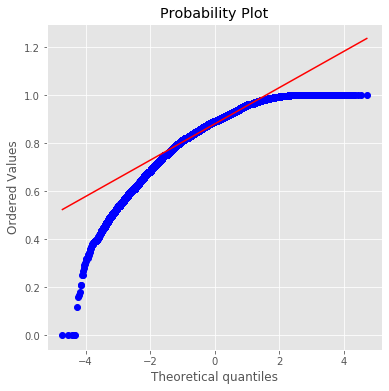

In [0]:
# Hillshade_Noon
fig = plt.figure(figsize=(6,6))
sns.distplot(ds['Hillshade_Noon'],fit=stats.norm)
fig = plt.figure(figsize=(6,6))
res = stats.probplot(ds['Hillshade_Noon'],plot=plt)

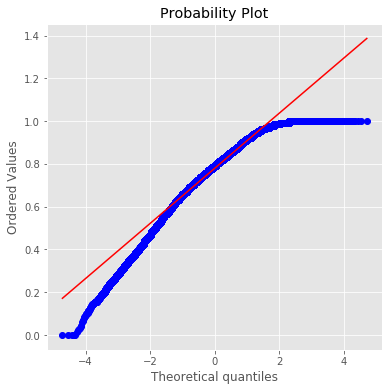

In [0]:
ds['Hillshade_Noon'] = np.square(ds['Hillshade_Noon'])
#fig = plt.figure(figsize=(6,6))
#sns.distplot(ds['Hillshade_Noon'],fit=stats.norm)
fig = plt.figure(figsize=(6,6))
res = stats.probplot(ds['Hillshade_Noon'],plot=plt)

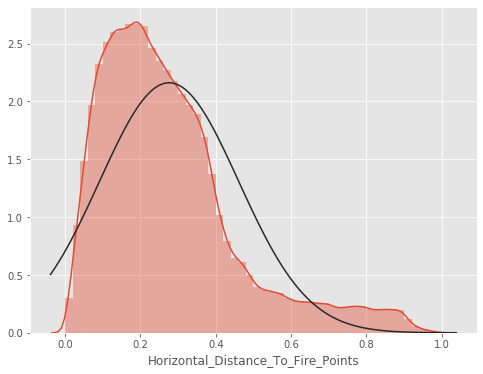

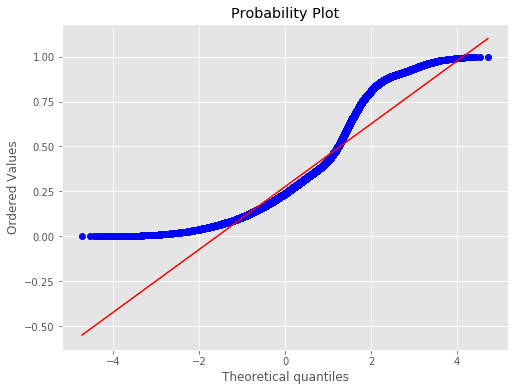

In [0]:
# Horizontal_Distance_To_Fire_Points
plt.figure(figsize=(8,6))
sns.distplot(ds['Horizontal_Distance_To_Fire_Points'], fit=stats.norm)
plt.figure(figsize=(8,6))
res = stats.probplot(ds['Horizontal_Distance_To_Fire_Points'],plot=plt)

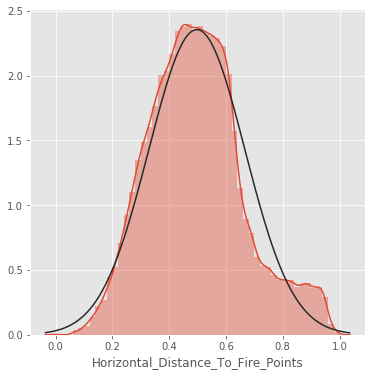

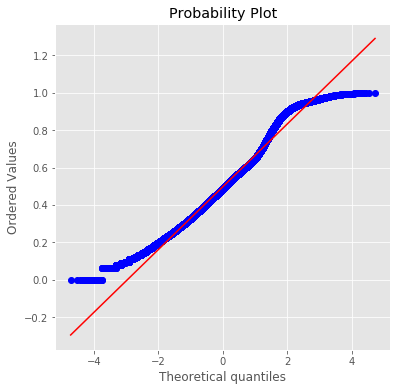

In [0]:
ds['Horizontal_Distance_To_Fire_Points'] = np.sqrt(ds['Horizontal_Distance_To_Fire_Points'])
plt.figure(figsize=(6,6))
sns.distplot(ds['Horizontal_Distance_To_Fire_Points'], fit=stats.norm)
plt.figure(figsize=(6,6))
res = stats.probplot(ds['Horizontal_Distance_To_Fire_Points'],plot=plt)

In [0]:
ds_test1=ds
ds_test1[['Horizontal_Distance_To_Hydrology','Horizontal_Distance_To_Fire_Points','Horizontal_Distance_To_Roadways']] = np.sqrt(ds_test1[['Horizontal_Distance_To_Hydrology',
        'Horizontal_Distance_To_Fire_Points','Horizontal_Distance_To_Roadways']])
ds_test1[['Hillshade_9am','Hillshade_Noon']] = np.sqrt(ds_test1[['Hillshade_9am','Hillshade_Noon']])
print(ds_test1)

        Elevation    Aspect     Slope  ...  Soil_Type39  Soil_Type40  Cover_Type
0        0.368684  0.141667  0.045455  ...            0            0           5
1        0.365683  0.155556  0.030303  ...            0            0           5
2        0.472736  0.386111  0.136364  ...            0            0           2
3        0.463232  0.430556  0.272727  ...            0            0           2
4        0.368184  0.125000  0.030303  ...            0            0           5
...           ...       ...       ...  ...          ...          ...         ...
581007   0.268634  0.425000  0.303030  ...            0            0           3
581008   0.266133  0.422222  0.287879  ...            0            0           3
581009   0.263632  0.441667  0.257576  ...            0            0           3
581010   0.262631  0.472222  0.227273  ...            0            0           3
581011   0.262131  0.458333  0.196970  ...            0            0           3

[581012 rows x 55 columns]


In [0]:
#reverse one hot encoding for soil type
soil_ds=ds.loc[:,'Soil_Type1':'Soil_Type40']
def rev_code(row):
    for c in soil_ds.columns:
        if row[c]==1:
            return c  

ds['Soil_Type']=soil_ds.apply(rev_code, axis=1)

In [0]:
#reverse one hot encoding for wilderness area
def rev_code(row):
    for c in Wilderness_data.columns:
        if row[c]==1:
            return c  

ds['Wilderness_Type']=Wilderness_data.apply(rev_code, axis=1)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

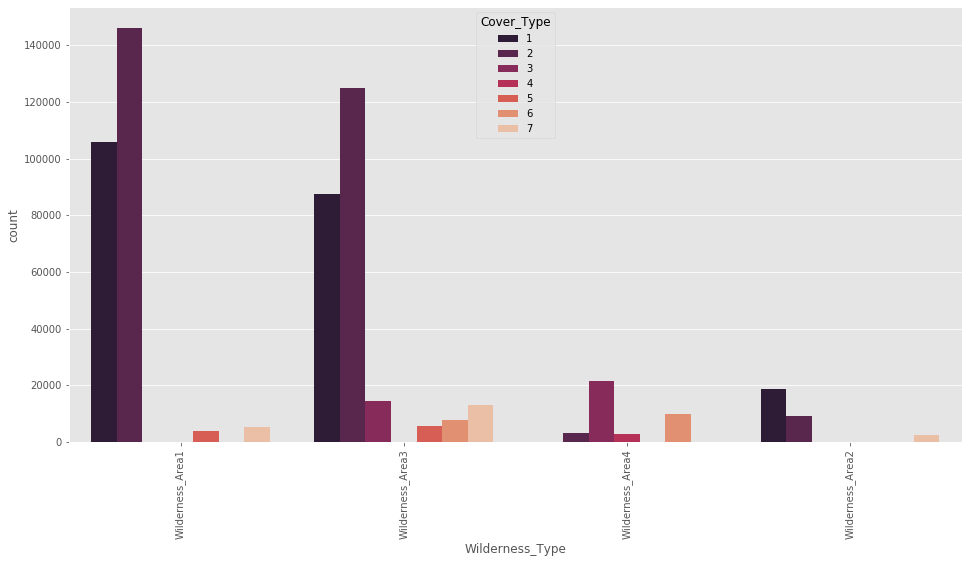

In [0]:
plt.figure(figsize=(16,8))
sns.countplot(x='Wilderness_Type', hue='Cover_Type',data=ds, palette="rocket")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]), <a list of 40 Text xticklabel objects>)

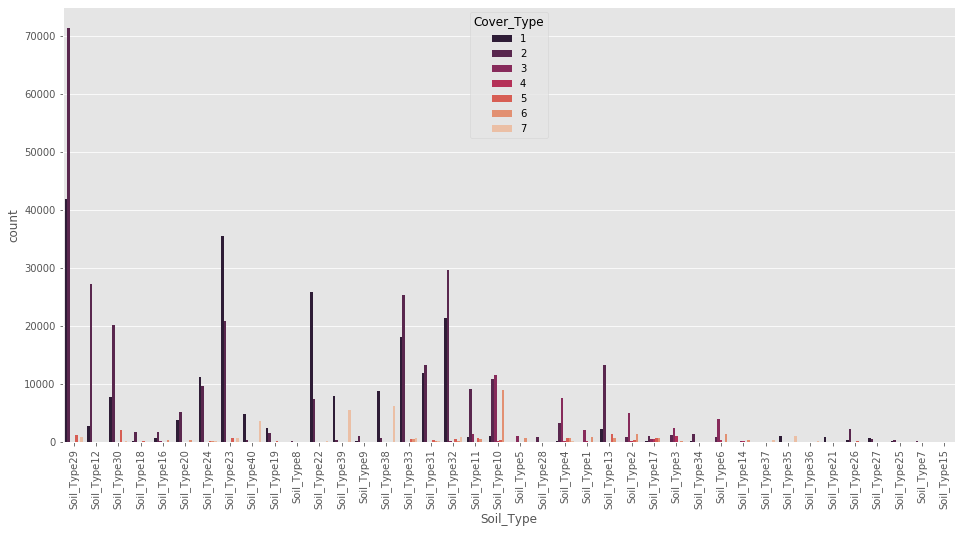

In [0]:
plt.figure(figsize=(16,8))
sns.countplot(x='Soil_Type', hue='Cover_Type',data=ds, palette="rocket")
plt.xticks(rotation=90)

In [0]:
#storing target and other features
X=ds.loc[:,'Elevation':'Soil_Type40']
y=ds['Cover_Type']

In [0]:
#removing features based on correlation analysis and SD
rem=['Hillshade_3pm','Soil_Type7','Soil_Type8','Soil_Type14','Soil_Type15',
     'Soil_Type21','Soil_Type25','Soil_Type28','Soil_Type36','Soil_Type37']

X.drop(rem, axis=1, inplace=True)

In [0]:
#splitting data into train and test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=101)

,Algorithm,Accuracy,Precision,Recall,F1 score
0,LinearSVC,0.709226,0.749282,0.709226,0.725814
1,DecisionTreeClassifier,0.935894,0.935940,0.935894,0.935913
2,LogisticRegression,0.711728,0.748669,0.711728,0.726755
3,GaussianNB,0.126050,0.751899,0.126050,0.131487
4,RandomForestClassifier,0.943943,0.945157,0.943943,0.944293
5,GradientBoostingClassifier,0.772788,0.783585,0.772788,0.776561


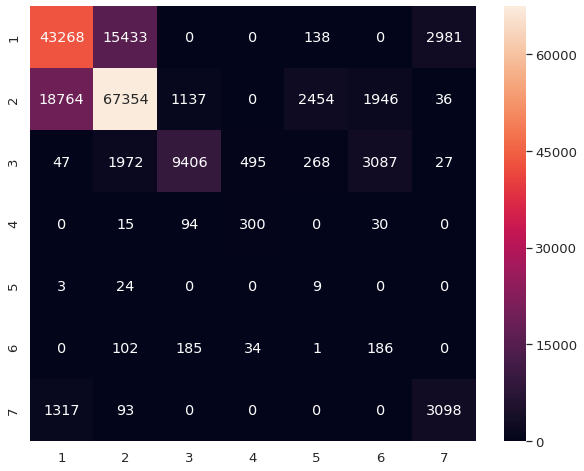

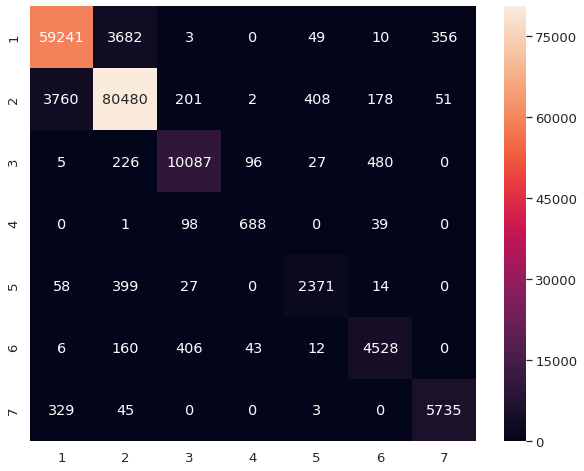

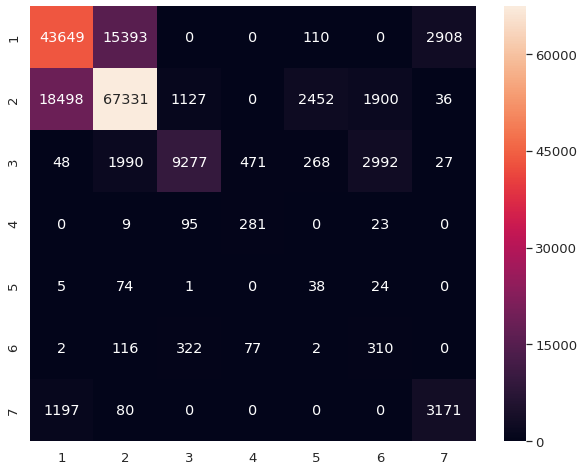

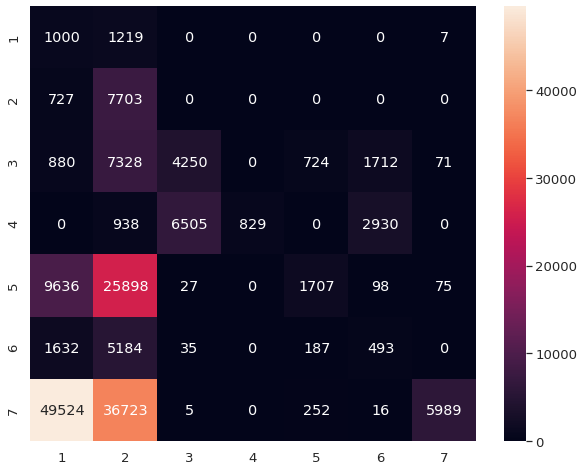

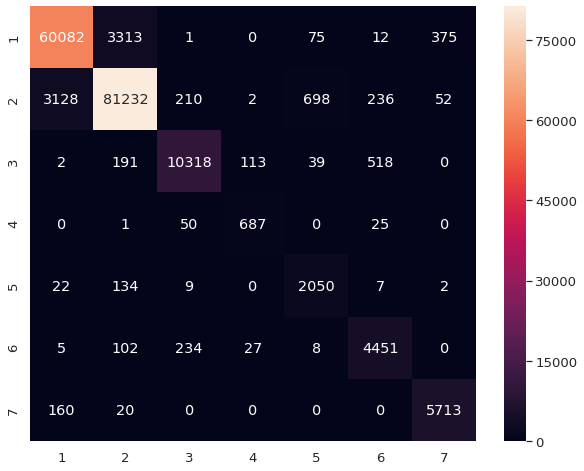

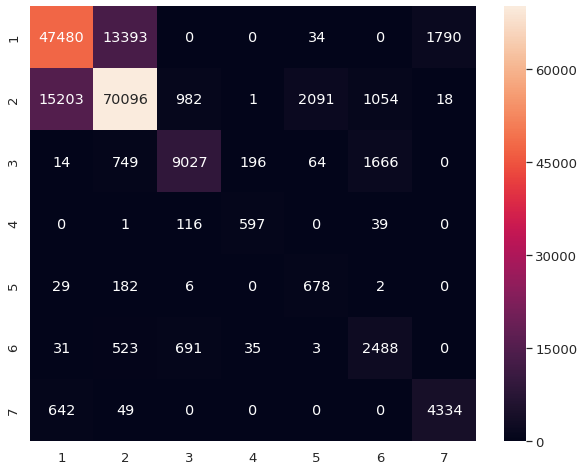

In [0]:
classification_accuracy = []
classification_precision = []
classification_recall = []
classification_f1score = []

M = [LinearSVC() , DecisionTreeClassifier() , LogisticRegression() , GaussianNB() ,RandomForestClassifier() , 
     GradientBoostingClassifier()]
X = ["LinearSVC" , "DecisionTreeClassifier" , "LogisticRegression" , "GaussianNB" ,"RandomForestClassifier" , 
     "GradientBoostingClassifier"]

for i in range(0,len(M)):
    model = M[i]
    model.fit( X_train , y_train )
    pred = model.predict(X_test)
    classification_accuracy.append(accuracy_score(pred , y_test))   
    classification_precision.append(precision_score(pred, y_test, average='weighted'))
    classification_recall.append(recall_score(pred, y_test, average='weighted'))
    classification_f1score.append(f1_score(pred, y_test, average='weighted'))
    
    cm = confusion_matrix(pred, y_test) 
    cm_df = pd.DataFrame(cm, range(1,8),range(1,8))
    plt.figure(figsize = (10,8))
    sns.set(font_scale=1.2)
    sns.heatmap(cm_df,annot=True,fmt='g')
    
    
d = { "Algorithm" : X, "Accuracy" : classification_accuracy, "Precision" : classification_precision, "Recall" : classification_recall, "F1 score" : classification_f1score}

dtfm = pd.DataFrame(d)
dtfm

Accuracy: 0.9283091610060584
              precision    recall  f1-score   support

           1       0.93      0.92      0.92     63399
           2       0.93      0.95      0.94     84993
           3       0.93      0.93      0.93     10822
           4       0.89      0.84      0.86       829
           5       0.84      0.76      0.80      2870
           6       0.88      0.86      0.87      5249
           7       0.93      0.92      0.93      6142

    accuracy                           0.93    174304
   macro avg       0.90      0.88      0.89    174304
weighted avg       0.93      0.93      0.93    174304



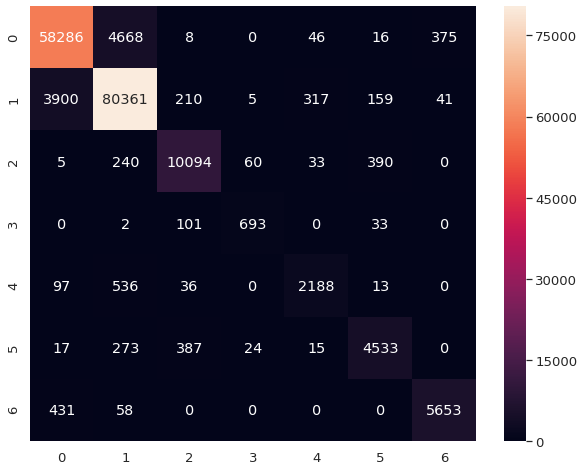

In [0]:
from sklearn import metrics
from sklearn.metrics import classification_report
knn=KNeighborsClassifier(n_neighbors=5)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=101)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

cm=confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()


In [0]:
#cross validation for some classifiers
models = []
models.append(('LR', LogisticRegression()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', LinearSVC()))
results = []
names = []
seed = 7
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.712686 (0.002100)
CART: 0.932468 (0.001351)
NB: 0.127480 (0.006227)
SVM: 0.710495 (0.002165)


In [0]:
models = []
models.append(('RDF',RandomForestClassifier(n_estimators=100)))
models.append(('KNN', KNeighborsClassifier(n_neighbors=5)))
results = []
names = []
seed = 7
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)


RDF: 0.953684 (0.001005)
KNN: 0.925632 (0.000750)


In [0]:
#Combining KNN and Random Forest for Voting
from sklearn.ensemble import VotingClassifier
model1 = KNeighborsClassifier(n_neighbors=5)
model2 = RandomForestClassifier(n_estimators=100, random_state=0)
ensemble_model = VotingClassifier(estimators=[('KNN', model1), ('RDF', model2)], voting='hard')
ensemble_model.fit(X_train,y_train)
pred_ensemble=ensemble_model.predict(X_test)
print(accuracy_score(pred_ensemble,y_test))

0.9419347806131816


Voting Precision: 0.9439713031611012
Voting Recall: 0.9419347806131816
Voting F1score: 0.9423594808789464
[[61004  4499     5     0   109    19   492]
 [ 2269 80216   287     2   738   327    58]
 [    1   120 10356   124    41   511     0]
 [    0     2    27   681     0    22     0]
 [   10    89     6     0  1975    11     0]
 [    5    52   141    22     7  4359     0]
 [  110    15     0     0     0     0  5592]]


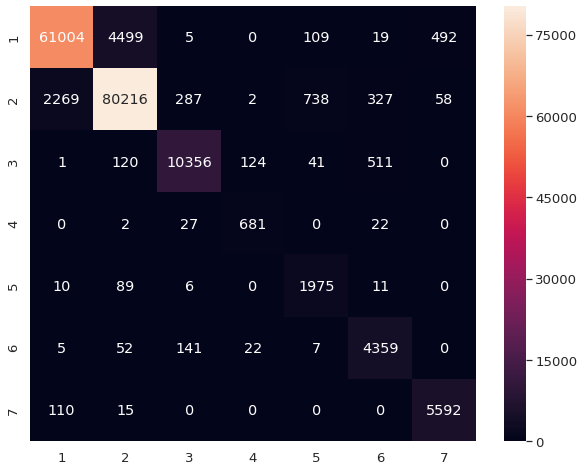

In [0]:
#performance metrics and confusion matrix
Precision  = precision_score(pred_ensemble, y_test, average='weighted')
Recall = recall_score(pred_ensemble, y_test, average='weighted')
f1score = f1_score(pred_ensemble, y_test, average='weighted')
cm = confusion_matrix(pred_ensemble, y_test)
print('Voting Precision:',Precision)
print('Voting Recall:',Recall)
print('Voting F1score:',f1score)
print(cm)

cm_df = pd.DataFrame(cm, range(1,8), range(1,8))
plt.figure(figsize = (10,8))
sns.set(font_scale=1.2)
sns.heatmap(cm_df,annot=True,fmt='g')

In [0]:
#Bagging
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
model.fit(X_train, y_train)
model.score(X_test,y_test)
pred_bagging=model.predict(X_test)
print(accuracy_score(pred_bagging,y_test))

0.9592436203414724


Bagging Precision: 0.959685902394051
Bagging Recall: 0.9592436203414724
Bagging F1score: 0.9593720151172236
[[61090  2480     1     0    45     1   313]
 [ 2135 82140   204     0   444   130    34]
 [    1   133 10402    95    26   376     0]
 [    0     0    39   703     0    15     0]
 [   11   153    11     0  2349     6     0]
 [    5    68   165    31     6  4721     0]
 [  157    19     0     0     0     0  5795]]


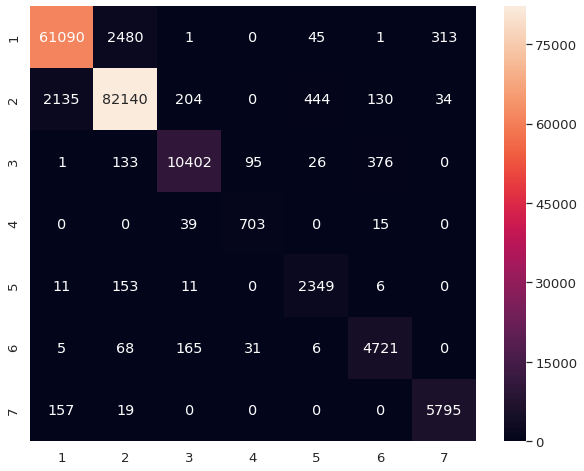

In [0]:
#performance metrics and confusion matrix
Precision  = precision_score(pred_bagging, y_test, average='weighted')
Recall = recall_score(pred_bagging, y_test, average='weighted')
f1score = f1_score(pred_bagging, y_test, average='weighted')
cm = confusion_matrix(pred_bagging, y_test)
print('Bagging Precision:',Precision)
print('Bagging Recall:',Recall)
print('Bagging F1score:',f1score)
print(cm)

cm_df = pd.DataFrame(cm, range(1,8), range(1,8))
plt.figure(figsize = (10,8))
sns.set(font_scale=1.2)
sns.heatmap(cm_df,annot=True,fmt='g')

In [0]:
#oversampling
from imblearn.over_sampling import SMOTE
smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X_train, y_train)
X_sm_df=pd.DataFrame(X_sm)
print(X_sm_df.index)

RangeIndex(start=0, stop=603098, step=1)


In [0]:
#KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_sm,y_sm)
pred = knn.predict(X_test)
Accuracy=knn.score(X_test,y_test)
Precision  = precision_score(pred, y_test, average='weighted')
Recall = recall_score(pred, y_test, average='weighted')
f1score = f1_score(pred, y_test, average='weighted')
cm = confusion_matrix(pred, y_test)
print('KNN Accuracy:',Accuracy)
print('KNN Precision:',Precision)
print('KNN Recall:',Recall)
print('KNN F1score:',f1score)
print(cm)

KNN Accuracy: 0.9270928951716542
KNN Precision: 0.9277037592530101
KNN Recall: 0.9270928951716542
KNN F1score: 0.9270862797478551
[[58286  3900     5     0    97    17   431]
 [ 4668 80356   240     0   536   272    58]
 [    8   205  9858    23    36   366     0]
 [    0    16   313   795     0   119     0]
 [   46   317    33     0  2188    15     0]
 [   16   158   373    11    13  4460     0]
 [  375    41     0     0     0     0  5653]]


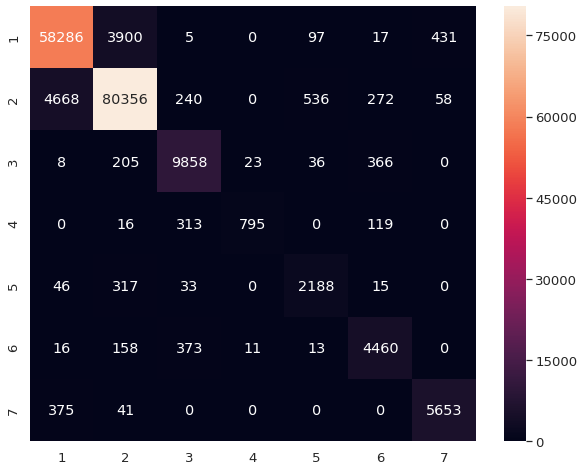

In [0]:
cm_df = pd.DataFrame(cm, range(1,8), range(1,8))
plt.figure(figsize = (10,8))
sns.set(font_scale=1.2)
sns.heatmap(cm_df,annot=True,fmt='g')

,Algorithm,Accuracy,Precision,Recall,F1 score
0,LinearSVC,0.690541,0.739420,0.690541,0.700967
1,DecisionTreeClassifier,0.934735,0.934702,0.934735,0.934699
2,LogisticRegression,0.694172,0.739012,0.694172,0.703905
3,GaussianNB,0.123985,0.751863,0.123985,0.130843
4,RandomForestClassifier,0.941321,0.942565,0.941321,0.941632
5,GradientBoostingClassifier,0.760786,0.775827,0.760786,0.763289


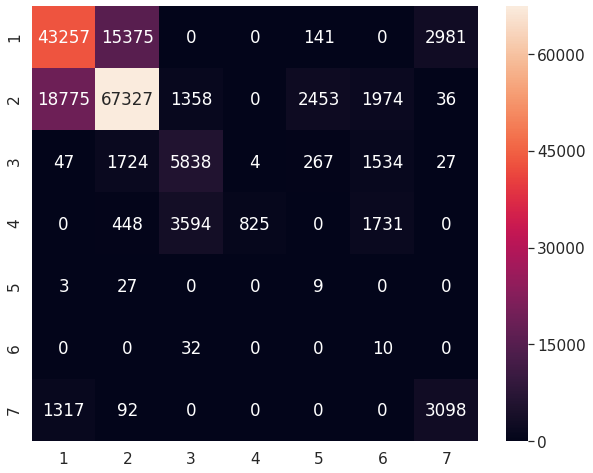

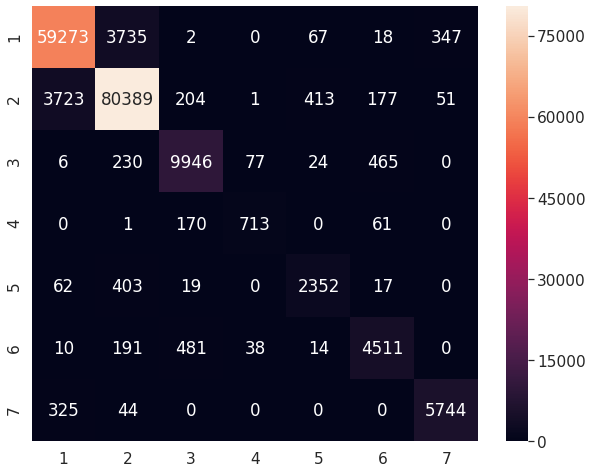

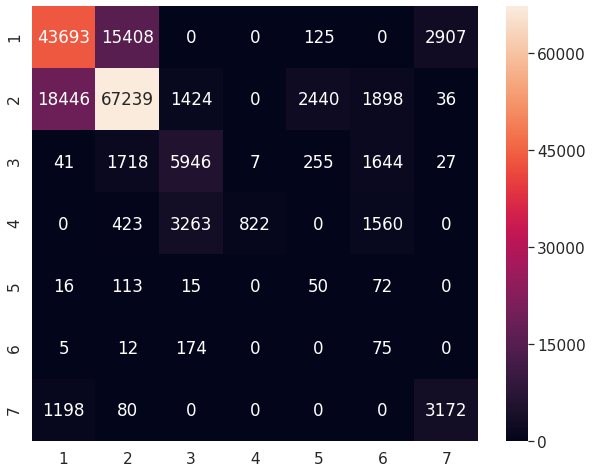

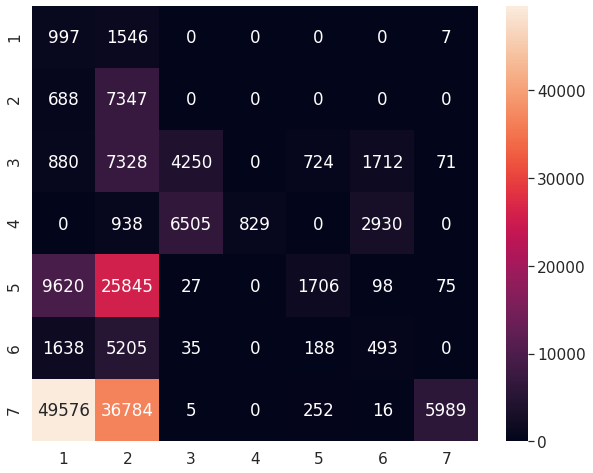

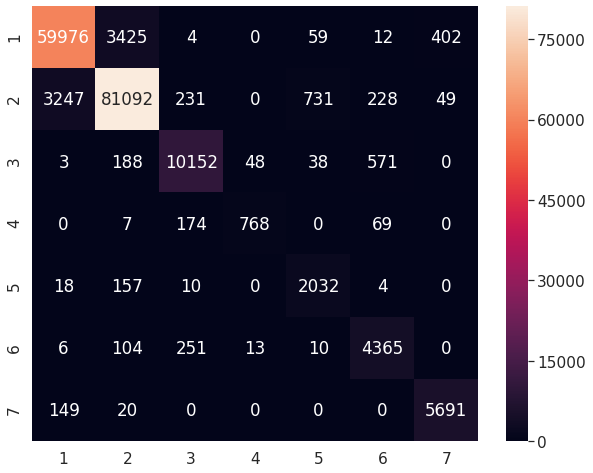

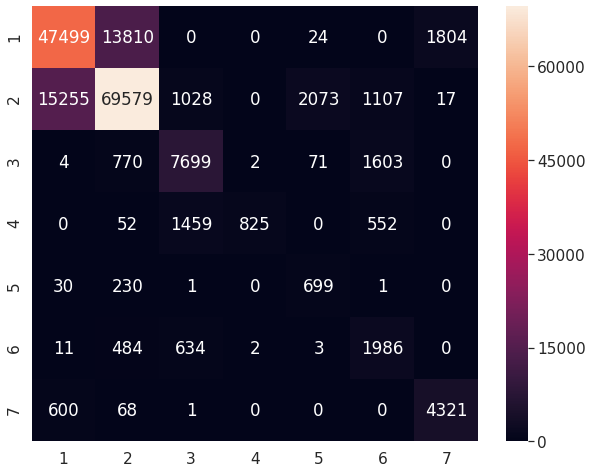

In [0]:
#other classifiers
classifier_accuracy = []
classifier_precision = []
classifier_recall = []
classifier_f1score = []

M = [LinearSVC() , DecisionTreeClassifier() , LogisticRegression() , GaussianNB() ,RandomForestClassifier() , 
     GradientBoostingClassifier()]
X = ["LinearSVC" , "DecisionTreeClassifier" , "LogisticRegression" , "GaussianNB" ,"RandomForestClassifier" , 
     "GradientBoostingClassifier"]

for i in range(0,len(Z)):
    model = Z[i]
    model.fit( X_sm , y_sm )
    pred = model.predict(X_test)
    classifier_accuracy.append(accuracy_score(pred , y_test))   
    classifier_precision.append(precision_score(pred, y_test, average='weighted'))
    classifier_recall.append(recall_score(pred, y_test, average='weighted'))
    classifier_f1score.append(f1_score(pred, y_test, average='weighted'))
    
    cm = confusion_matrix(pred, y_test)
    cm_df = pd.DataFrame(cm, range(1,8),range(1,8))
    plt.figure(figsize = (10,8))
    sns.set(font_scale=1.2)
    sns.heatmap(cm_df,annot=True,fmt='g')
    
    
d = { "Algorithm" : X, "Accuracy" : classifier_accuracy, "Precision" : classifier_precision, "Recall" : classifier_recall, "F1 score" : classifier_f1score}

df = pd.DataFrame(d)
df

In [0]:
#undersampling
from imblearn.under_sampling import RandomUnderSampler
rs = RandomUnderSampler(return_indices=True)
X_rs, y_rs, id_rs = rs.fit_sample(X_train, y_train)
X_rs_df=pd.DataFrame(X_rs)
print(X_rs_df.index)

RangeIndex(start=0, stop=13426, step=1)


KNN Accuracy: 0.6502317789608959
KNN Precision: 0.696184236914596
KNN Recall: 0.6502317789608959
KNN F1score: 0.6321039528721819
[[42222 18376     3     0    48    11   296]
 [12254 49516   118     0   137    72    41]
 [   65  2070  8017    16    46   501     0]
 [    0   110   693   795     0   176     0]
 [ 2714 10909   212     0  2608   106     5]
 [  456  2997  1779    18    31  4383     3]
 [ 5688  1015     0     0     0     0  5797]]


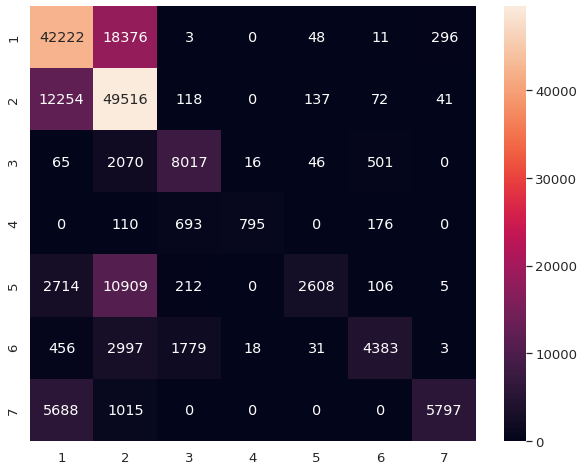

In [0]:
#KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_rus,y_rus)
pred = knn.predict(X_test)
Accuracy=knn.score(X_test,y_test)
Precision  = precision_score(pred, y_test, average='weighted')
Recall = recall_score(pred, y_test, average='weighted')
f1score = f1_score(pred, y_test, average='weighted')
cm = confusion_matrix(pred, y_test)
print('KNN Accuracy:',Accuracy)
print('KNN Precision:',Precision)
print('KNN Recall:',Recall)
print('KNN F1score:',f1score)
print(cm)

cm_df = pd.DataFrame(cm, range(1,8), range(1,8))
plt.figure(figsize = (10,8))
sns.set(font_scale=1.2)
sns.heatmap(cm_df,annot=True,fmt='g')

,Algorithm,Accuracy,Precision,Recall,F1 score
0,LinearSVC,0.552902,0.613727,0.552902,0.520458
1,DecisionTreeClassifier,0.665355,0.694197,0.665355,0.655267
2,LogisticRegression,0.562116,0.608175,0.562116,0.528892
3,GaussianNB,0.129595,0.790909,0.129595,0.131444
4,RandomForestClassifier,0.719519,0.747067,0.719519,0.711795
5,GradientBoostingClassifier,0.650639,0.699023,0.650639,0.630048


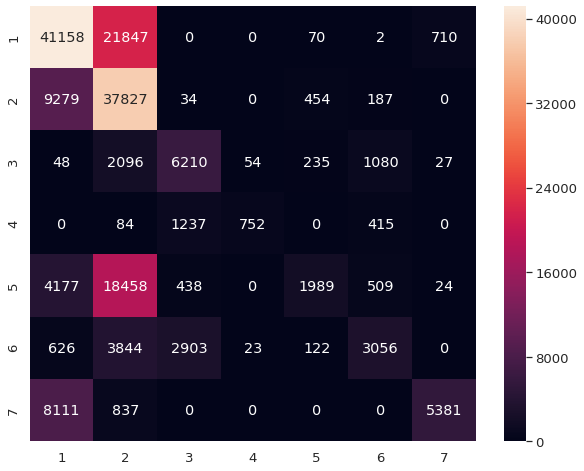

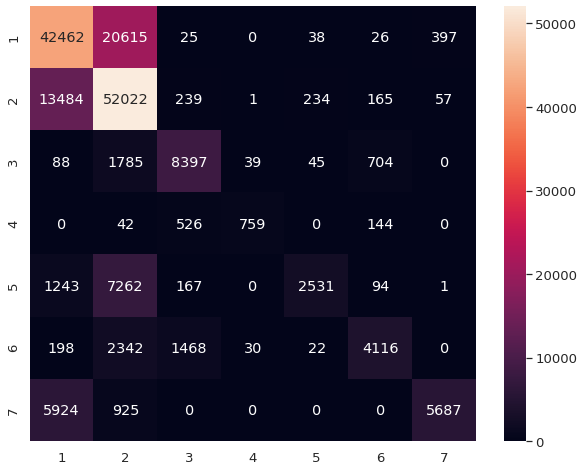

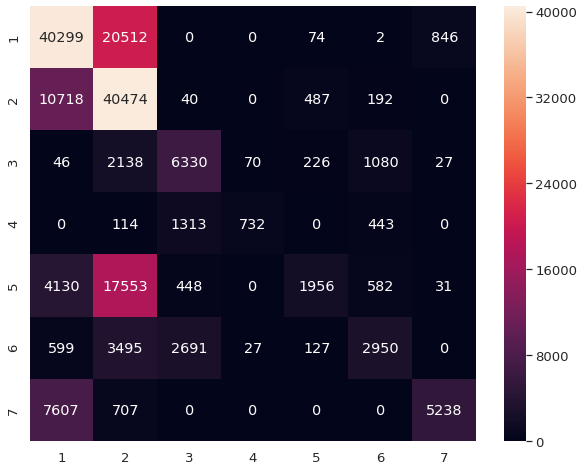

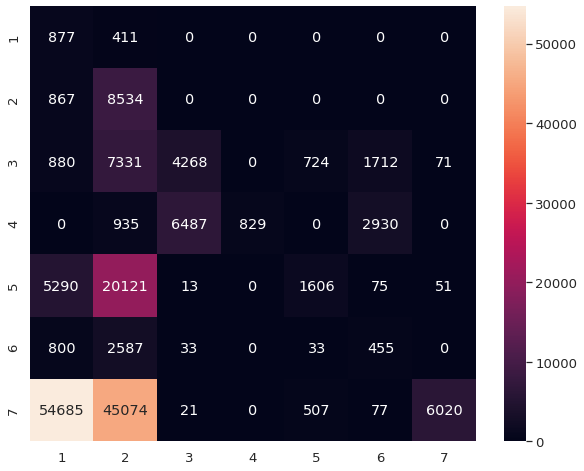

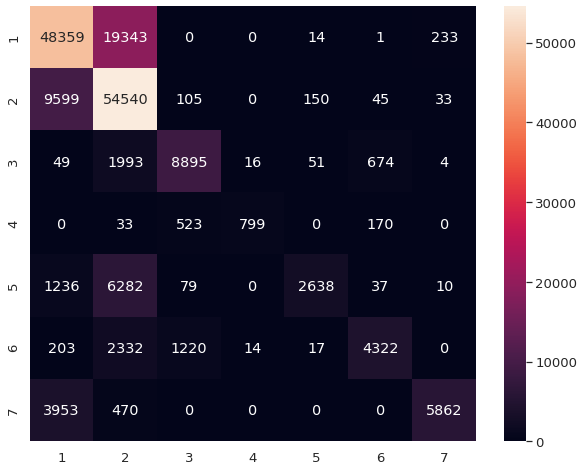

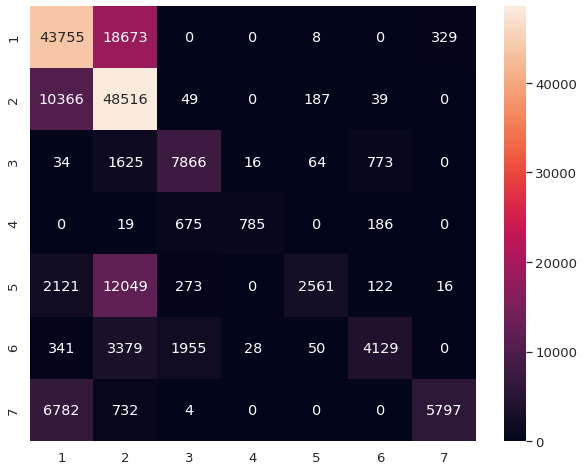

In [0]:
#other classifers
classifier_accuracy = []
classifier_precision = []
classifier_recall = []
classifier_f1score = []

M = [LinearSVC() , DecisionTreeClassifier() , LogisticRegression() , GaussianNB() ,RandomForestClassifier() , 
     GradientBoostingClassifier()]
X = ["LinearSVC" , "DecisionTreeClassifier" , "LogisticRegression" , "GaussianNB" ,"RandomForestClassifier" , 
     "GradientBoostingClassifier"]

for i in range(0,len(M)):
    model = M[i]
    model.fit( X_rs , y_rs )
    pred = model.predict(X_test)
    classifier_accuracy.append(accuracy_score(pred , y_test))   
    classifier_precision.append(precision_score(pred, y_test, average='weighted'))
    classifier_recall.append(recall_score(pred, y_test, average='weighted'))
    classifier_f1score.append(f1_score(pred, y_test, average='weighted'))
    
    cm = confusion_matrix(pred, y_test)
    cm_df = pd.DataFrame(cm, range(1,8),range(1,8))
    plt.figure(figsize = (10,8))
    sns.set(font_scale=1.2)
    sns.heatmap(cm_df,annot=True,fmt='g')
    
    
d = { "Algorithm" : X, "Accuracy" : classifier_accuracy, "Precision" : classifier_precision, "Recall" : classifier_recall, "F1 score" : classifier_f1score}

df = pd.DataFrame(d)
df

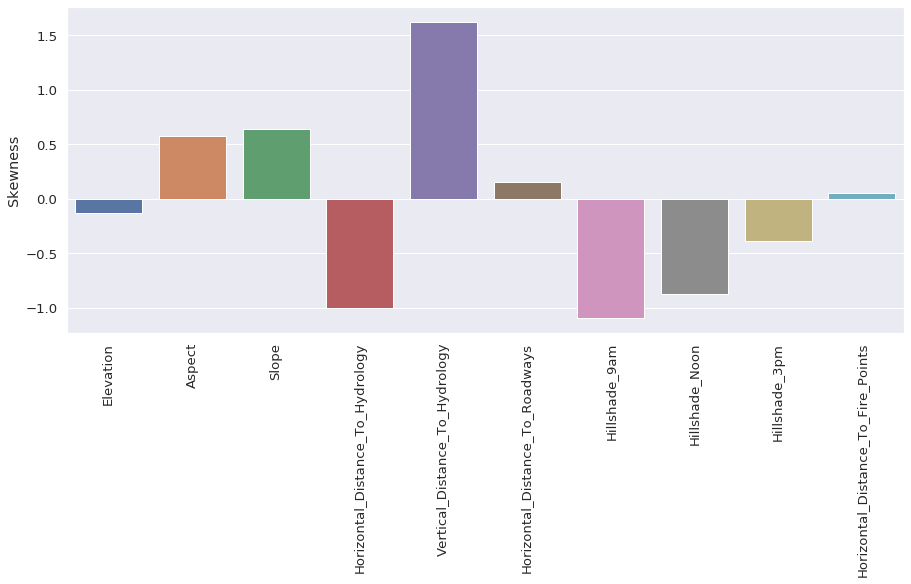

In [0]:
#oversampling
X=ds.loc[:,'Elevation':'Soil_Type40']
y=ds['Cover_Type']
from imblearn.over_sampling import SMOTE
smote=SMOTE(ratio='minority')
X_s, y_s = smote.fit_sample(X,y)
smote_df=pd.DataFrame(X_s,columns=X.columns)
cont_df=smote_df.iloc[:, :10]
skew=cont_df.skew()
skew_df=pd.DataFrame(skew, index=None, columns=['Skewness'])
plt.figure(figsize=(15,6))
sns.barplot(x=skew_df.index,y='Skewness',data=skew_df)
plt.xticks(rotation=90)
plt.show()

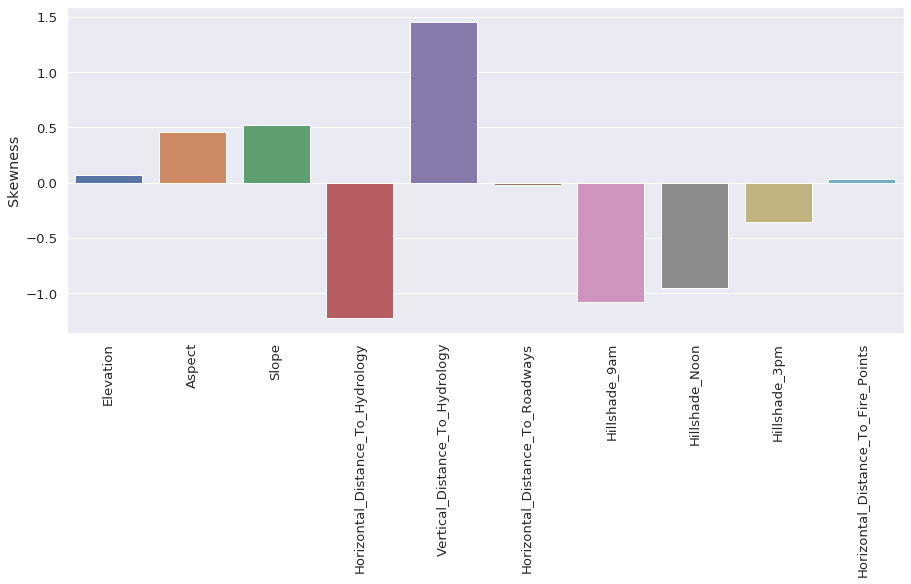

In [0]:
#undersampling
from imblearn.under_sampling import RandomUnderSampler
rs=RandomUnderSampler(return_indices=True)
X_rs, y_rs,rs_id = rs.fit_sample(X,y)
undersample_df=pd.DataFrame(X_rs,columns=X.columns)
cont_df=undersample_df.iloc[:, :10]
skew=cont_df.skew()
skew_df=pd.DataFrame(skew, index=None, columns=['Skewness'])
plt.figure(figsize=(15,6))
sns.barplot(x=skew_df.index,y='Skewness',data=skew_df)
plt.xticks(rotation=90)
plt.show()

In [0]:
from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import sem
from scipy.stats import t
 
data1=ds.loc[:,'Elevation':'Soil_Type40']
data2=ds['Cover_Type']
# function for calculating the t-test for two independent samples
def independent_ttest(data1, data2, alpha):
	# calculate means
	mean1, mean2 = mean(data1), mean(data2)
	# calculate standard errors
	se1, se2 = sem(data1), sem(data2)
	# standard error on the difference between the samples
	sed = sqrt(se1**2.0 + se2**2.0)
	# calculate the t statistic
	t_stat = (mean1 - mean2) / sed
	# degrees of freedom
	df = len(data1) + len(data2) - 2
	# calculate the critical value
	cv = t.ppf(1.0 - alpha, df)
	# calculate the p-value
	p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
	# return everything
	return t_stat, df, cv, p
 
# seed the random number generator
seed(1)
# generate two independent samples
data1 = 5 * randn(100) + 50
data2 = 5 * randn(100) + 51
# calculate the t test
alpha = 0.05
t_stat, df, cv, p = independent_ttest(data1, data2, alpha)
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))
# interpret via critical value
if abs(t_stat) <= cv:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')
# interpret via p-value
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')


t=-2.262, df=198, cv=1.653, p=0.025
Reject the null hypothesis that the means are equal.
Reject the null hypothesis that the means are equal.
